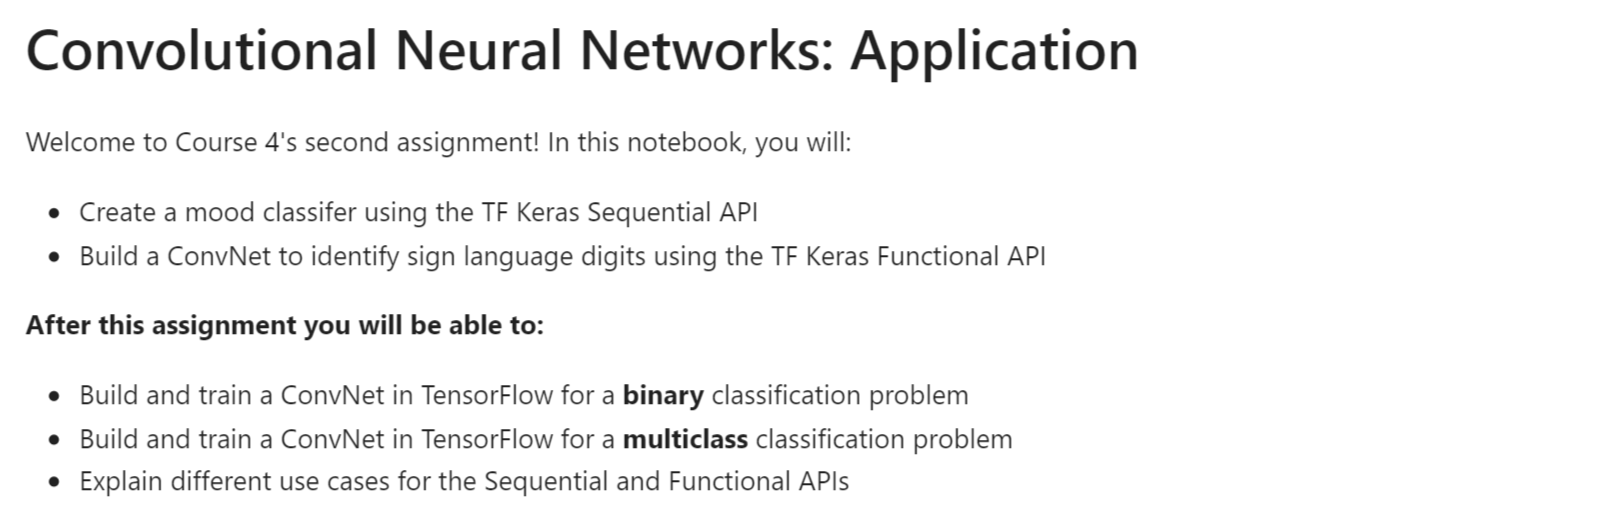

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


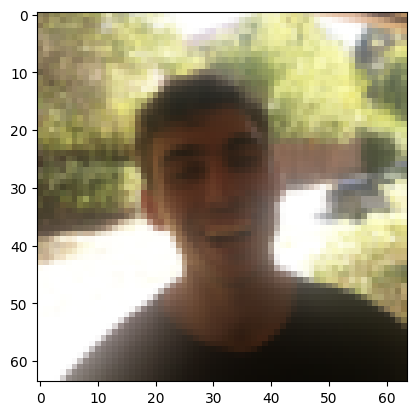

In [18]:
index = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [21]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    layers = [
        tfl.ZeroPadding2D(padding=(3,3), input_shape=(64, 64, 3)),
        tfl.Conv2D(32, (7, 7)),
        tfl.BatchNormalization(3),
        tfl.ReLU(),
        tfl.MaxPooling2D(), # Default value of filter = (2,2)
        tfl.Flatten(),
        tfl.Dense(1, activation='sigmoid')
    ]
    model = tf.keras.Sequential(layers=layers, name='happyModel')
    
    return model
    

In [22]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [23]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [24]:
happy_model.summary()

Model: "happyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                        

In [25]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10


38/38 [==============================] - 1s 16ms/step - loss: 1.1911 - accuracy: 0.6867
Epoch 2/10
38/38 [==============================] - 1s 16ms/step - loss: 0.2233 - accuracy: 0.9167
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 0.1508 - accuracy: 0.9450
Epoch 4/10
38/38 [==============================] - 1s 15ms/step - loss: 0.1596 - accuracy: 0.9367
Epoch 5/10
38/38 [==============================] - 1s 15ms/step - loss: 0.2087 - accuracy: 0.9200
Epoch 6/10
38/38 [==============================] - 1s 18ms/step - loss: 0.2018 - accuracy: 0.9350
Epoch 7/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0853 - accuracy: 0.9717
Epoch 8/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0996 - accuracy: 0.9633
Epoch 9/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0595 - accuracy: 0.9783
Epoch 10/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0995 - accuracy: 0.9650


In [26]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 11ms/step - loss: 0.2674 - accuracy: 0.8933


[0.26735833287239075, 0.8933333158493042]